# Data Exploration

Let's try to duplicate some of the data exploration we did this week, but in Python. The package of interest this week is seaborn or matplotlib. Seaborn (https://seaborn.pydata.org) sits on top of matplotlib and is a bit easier to use.

Several data visualization libraries in python exist such as: matplotlib, pygal, seaborn,plotly, altair, seaborn, ggplot etc.

In particular, the tutorials on the seaborn site are very useful and easy to understand. We'll go through some of the methods here.

First of all, let's read in the data set. You'll need to change the path accordingly.

## Library Imports

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Seaborn Configuration
Use this to set the resolution of the images produced by seaborn; other settings can also be set

In [35]:
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

## Loading the Data

In [40]:
DATAFILE = 'imports-85.csv'
imports_85 = pd.read_csv(DATAFILE)

## A quick first look at the data

Hopefully this process is starting to become natural; we'll start with a quick look at the table with `head()`, check the columns and get a quick data description.

In [41]:
imports_85.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
imports_85.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [45]:
imports_85.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Moving to Visual Data Exploration

Visual data exploration can often be quicker and more intuitive than working directly with the data. Compare the two methods of exploring the `wheel-base` attribute. While both are helpful the histogram provides clear information regarding the data distribution incredibly quickly.

In [53]:
print("Summary statistics for 'wheel-base'\n")
print(imports_85['wheel-base'].describe())

Summary statistics for 'wheel-base'

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64


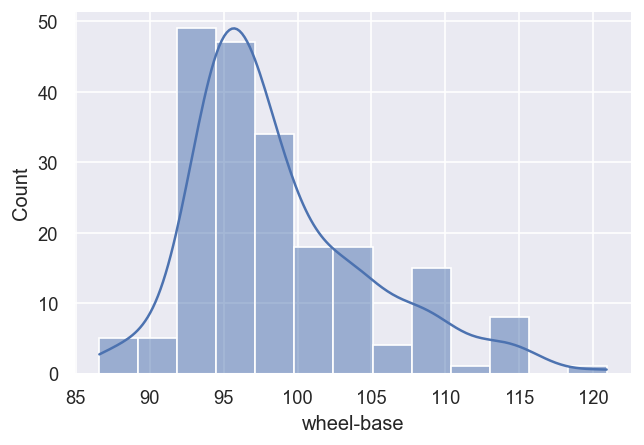

In [57]:
sns.histplot(imports_85['wheel-base'], kde=True,);

Seaborn is very powerful, and allows for the creation of complex visualisation with very little code.

For example, the code below uses the [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to combine multiple plots into a single image.

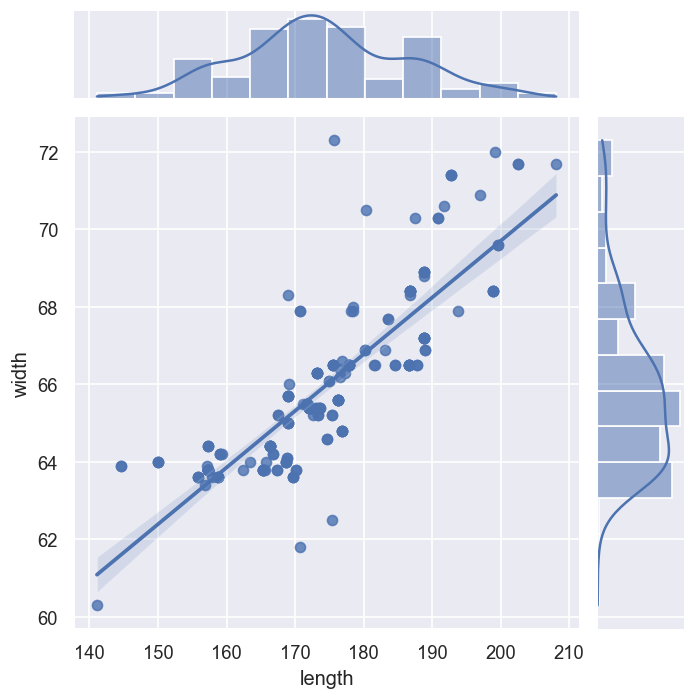

In [59]:
# Bivariate Distribution plot 
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }
sns.jointplot(x='length', y='width', data=imports_85, kind='reg');

Seaborn plots can be quickly customised with little extra code

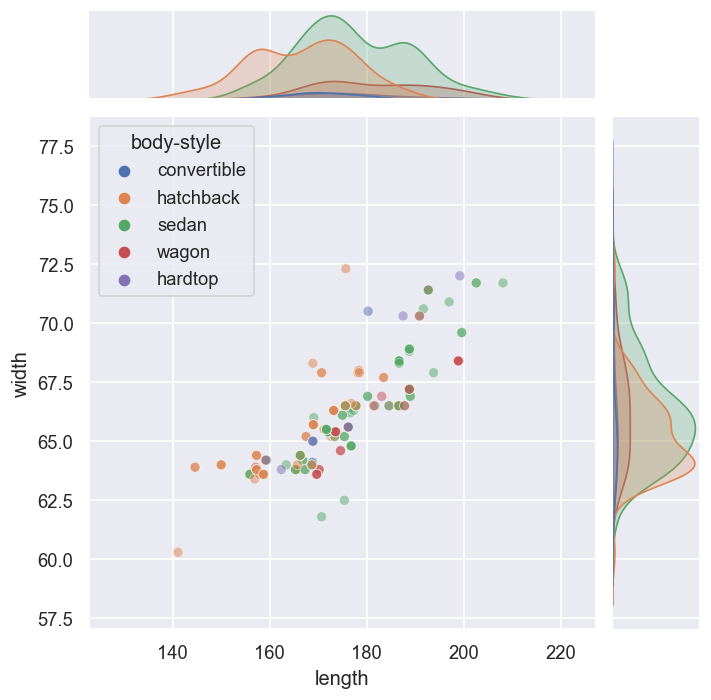

In [66]:
sns.jointplot(x='length', y='width', data=imports_85, hue="body-style", alpha=0.5);

# PairPlot

A (very) powerful and commonly used feature of Seaborn is the `pairplot()` which compares each attribute in the dataset and provides histograms along the diagonal. This (combined with the pandas `describe()`) is a great tool for starting out your data exploration.

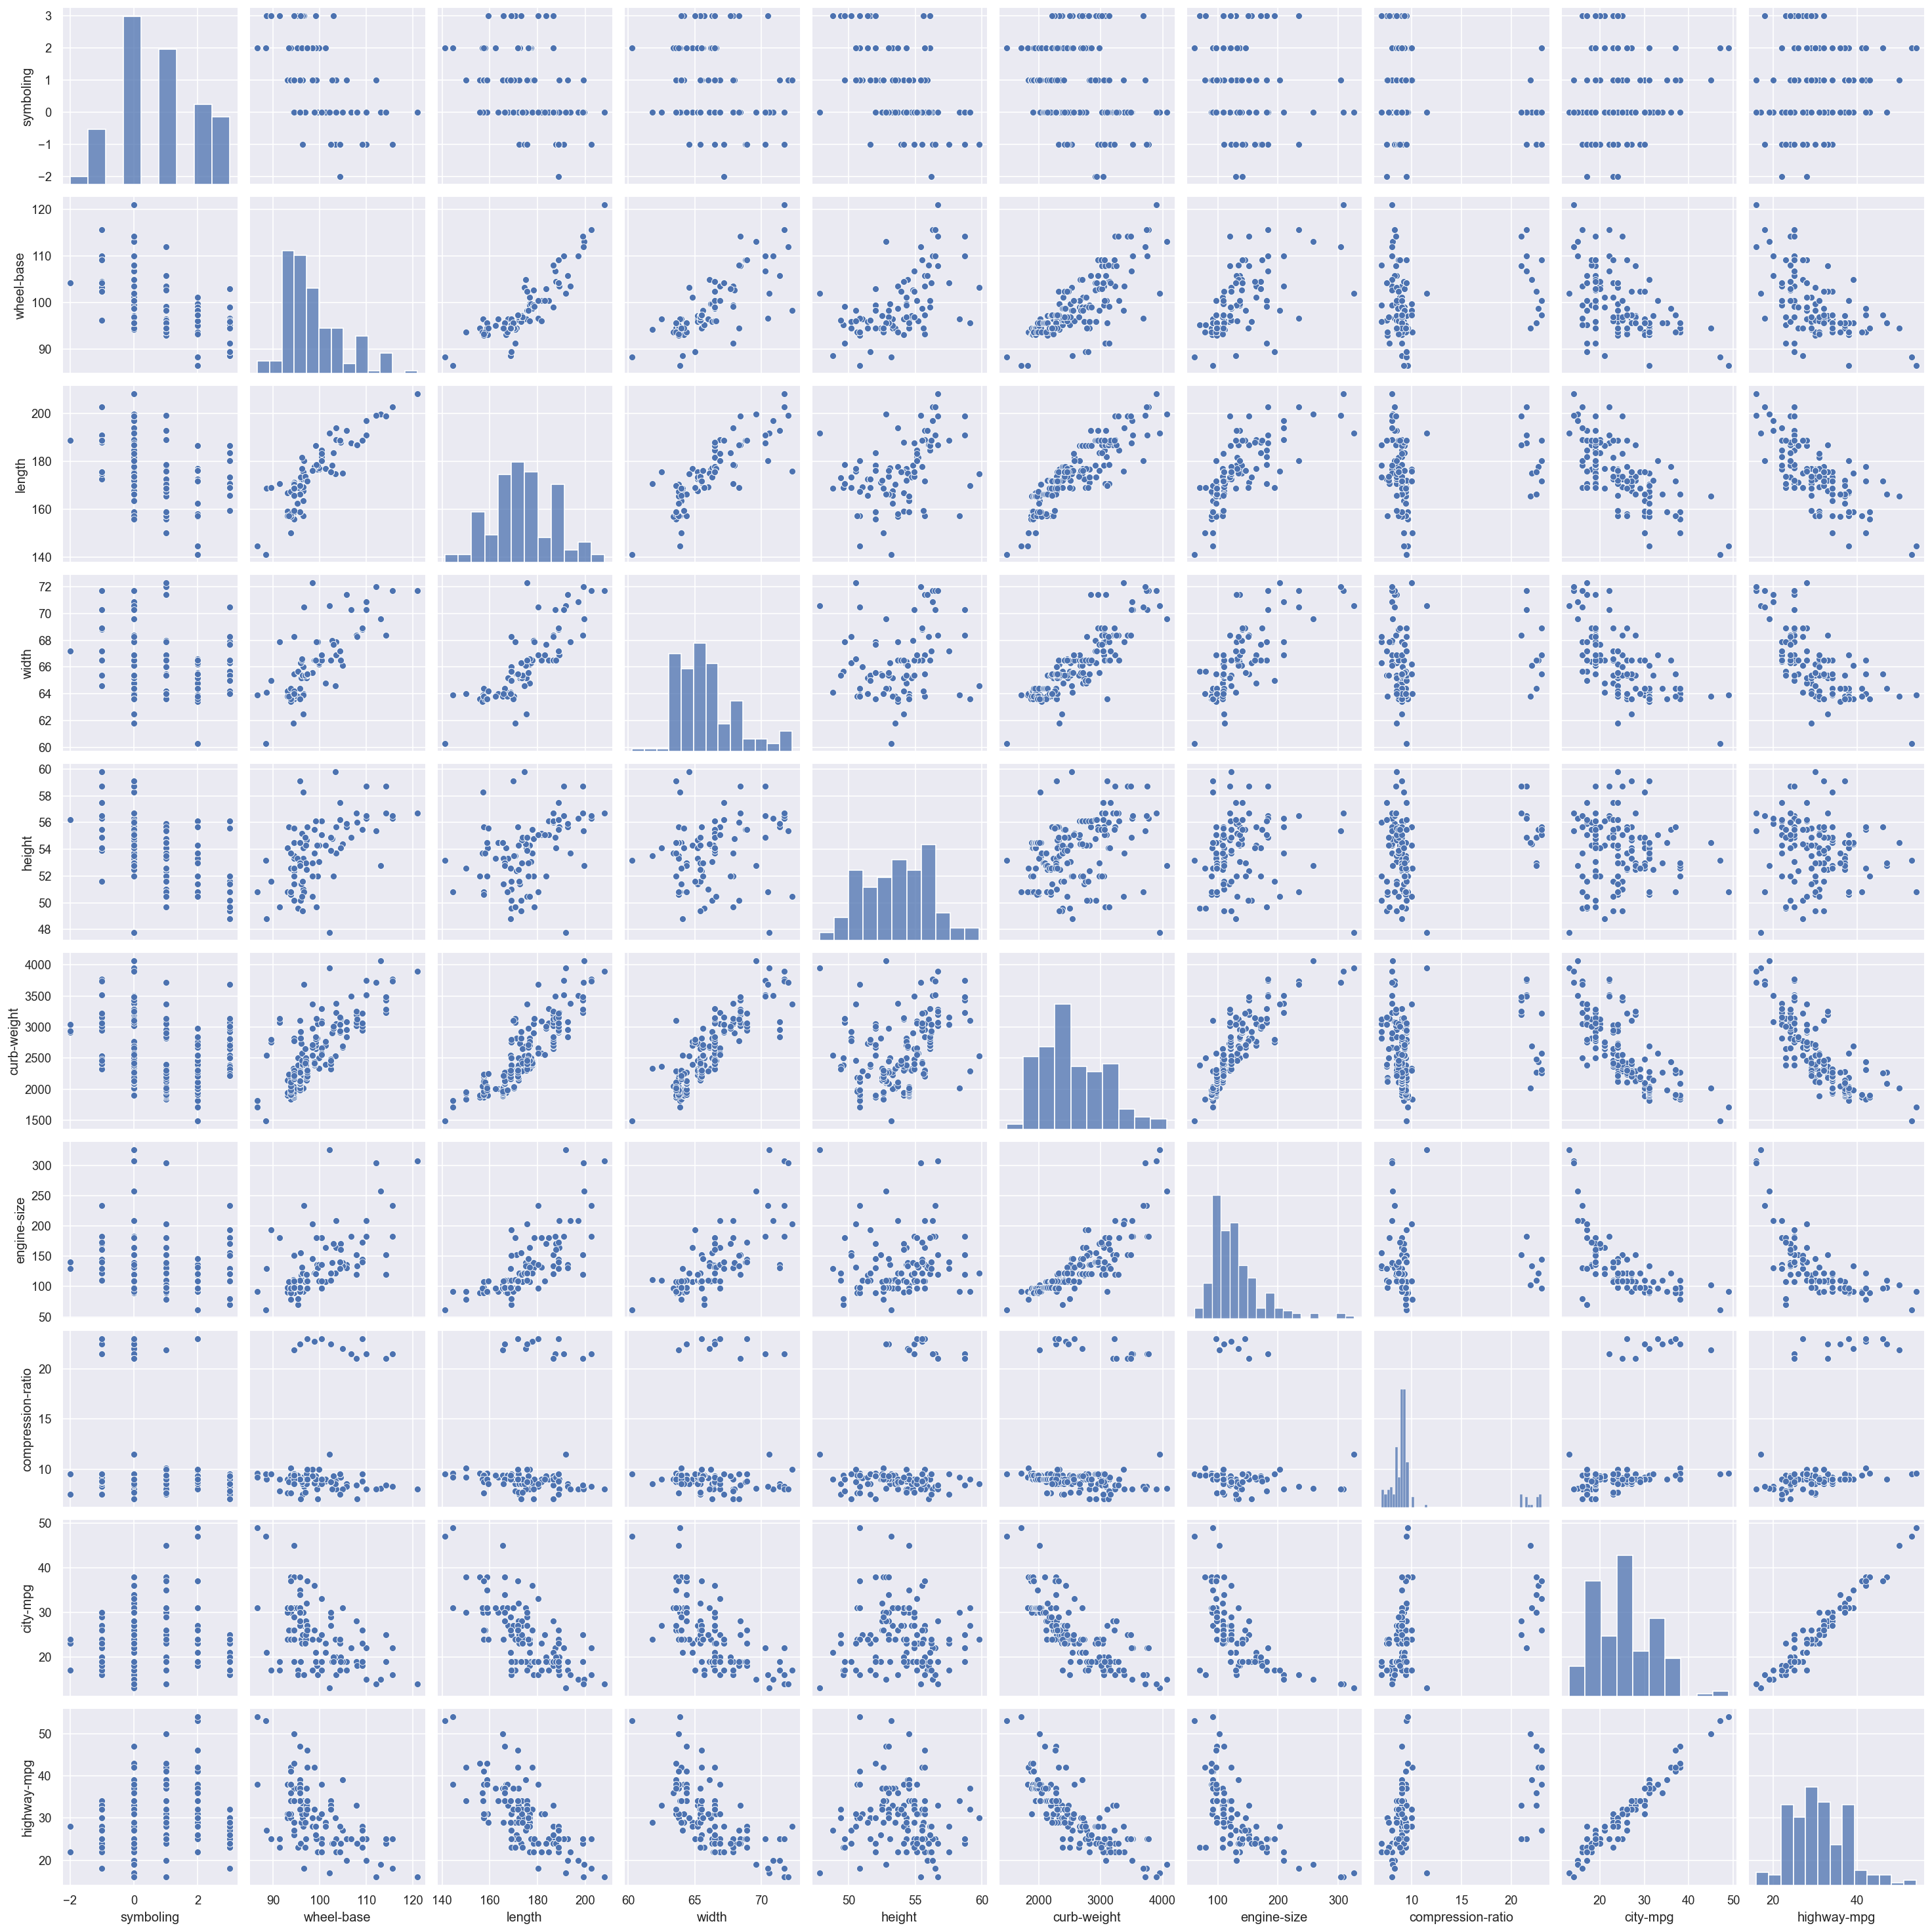

In [65]:
#Pair plot
sns.pairplot(imports_85)

# Feature Correlation

While the `pairplot` above shows some correlations visually, we an also use pandas to get a numeric value on feature correlation.

In [67]:
# Showing correlation between features
imports_corr = imports_85.corr()
imports_corr

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


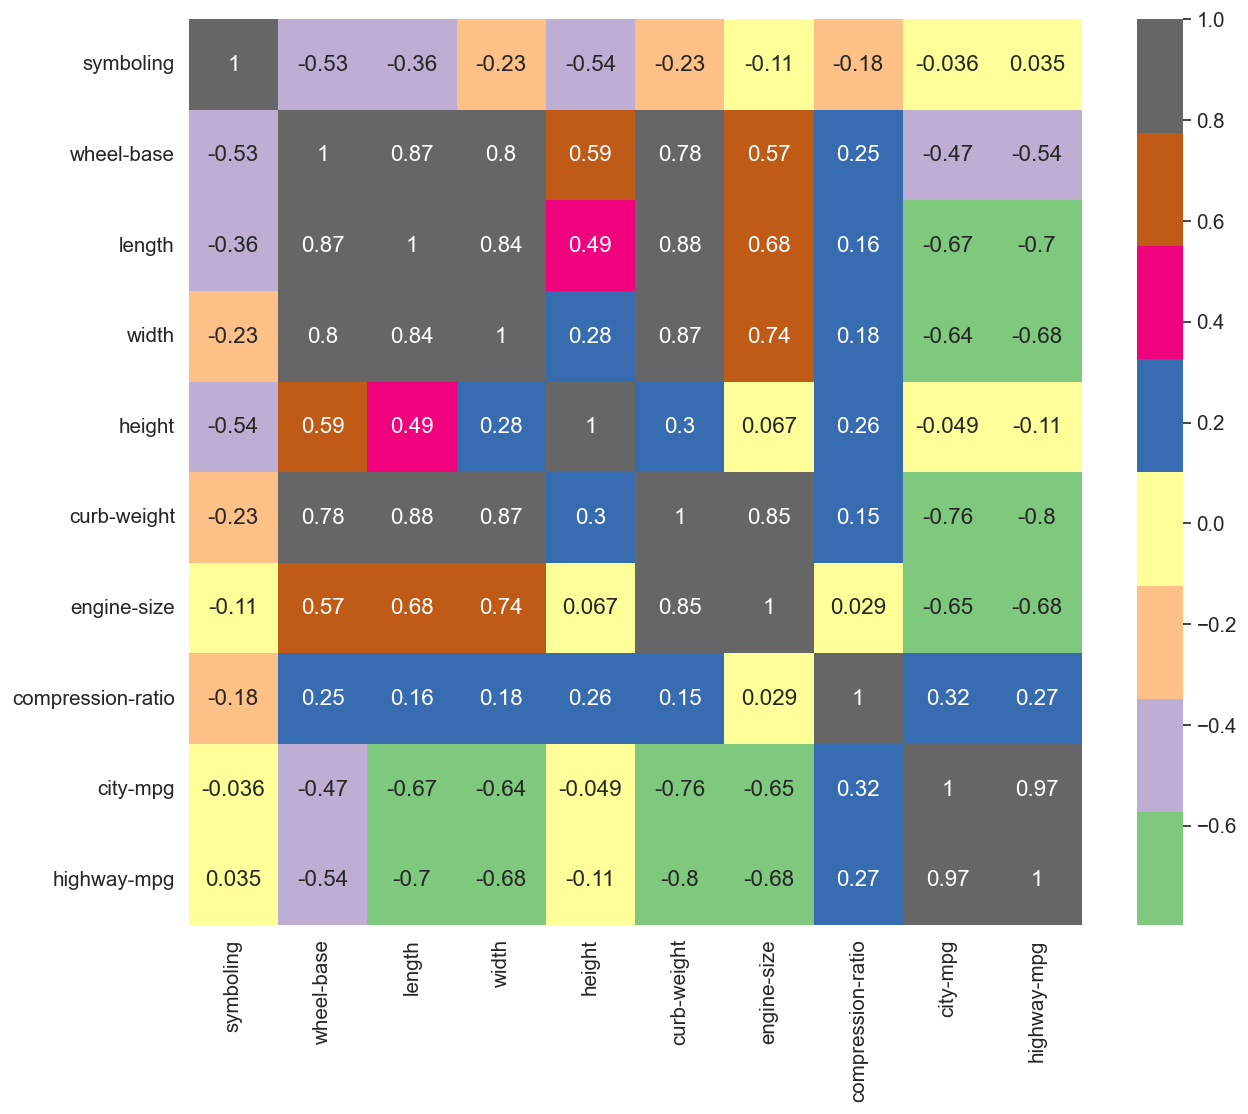

In [77]:
# Heatmaps

plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.4)

# Create the heatmap, add annotations and a color map
sns.heatmap(imports_corr, annot=True, cmap='Accent');

We can examine some of the relationships that pandas finds more closely with the `regplot()` ([regression plot](https://seaborn.pydata.org/generated/seaborn.regplot.html)). For example, pandas reports a strong correlation between `curb-weight` and `engine-size` (0.85).

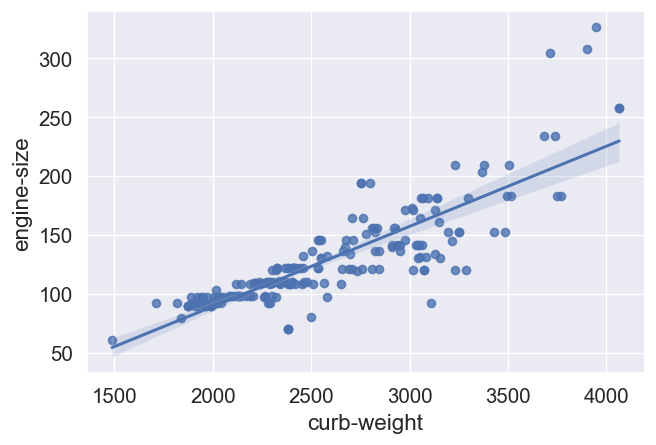

In [73]:
sns.regplot(x='curb-weight', y='engine-size', data=imports_85);

# Scatterplots and Customisation

The most straightforward approach is to do a scatter plot. You use the `relplot` method in Seaborn. This plots length by width. The third variable gives the dataset to use. There are other functions that are also useful. More documentation is available on the [Seaborn website](https://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot)

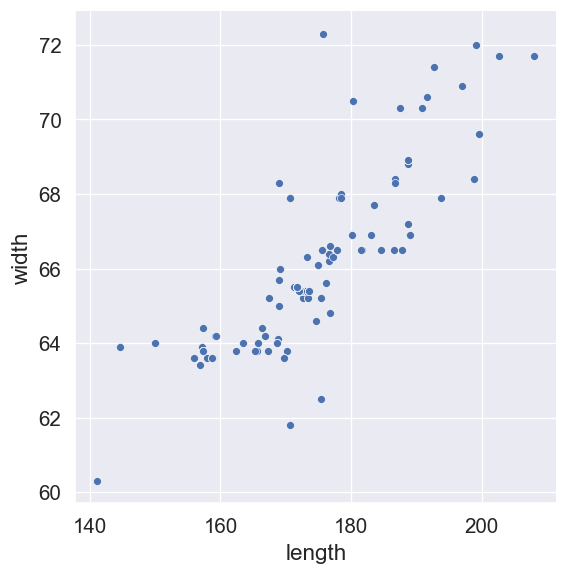

In [32]:
sns.relplot(x="length", y="width", data=imports_85);

Here we add a colour based on a categorical attribute.

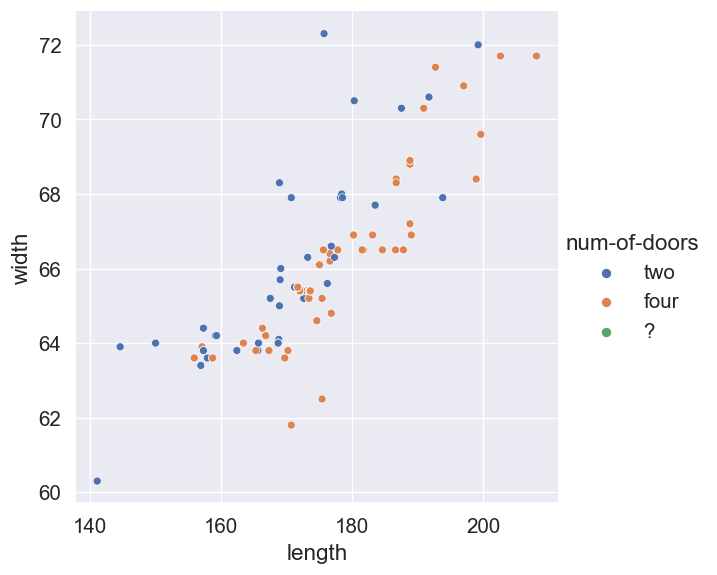

In [78]:
sns.relplot(x="length", y="width", hue="num-of-doors", data=imports_85);

In this next example, we add a style for the point being plotted.

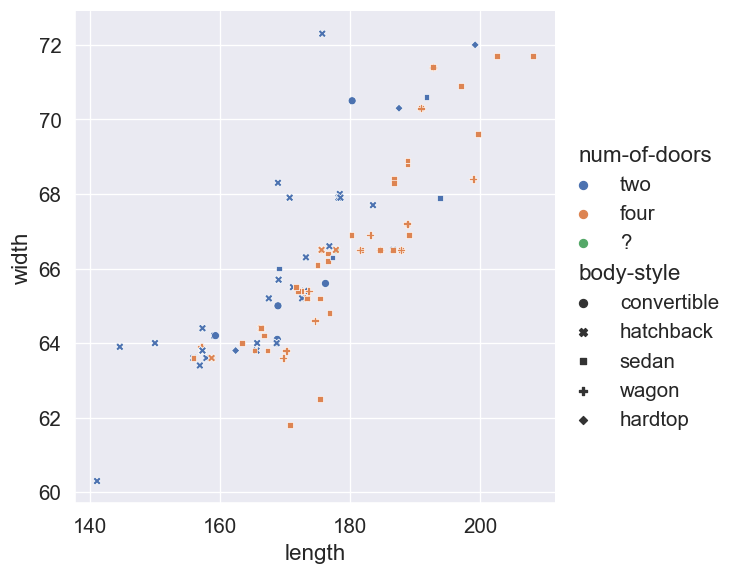

In [79]:
sns.relplot(x="length", y="width", hue="num-of-doors", style="body-style", data=imports_85);

... and here we associate the colour with a non-categorical attribute. You can see you get a wider range of colours. The colour palette is customisable. See the seaborn tutorial for more information.

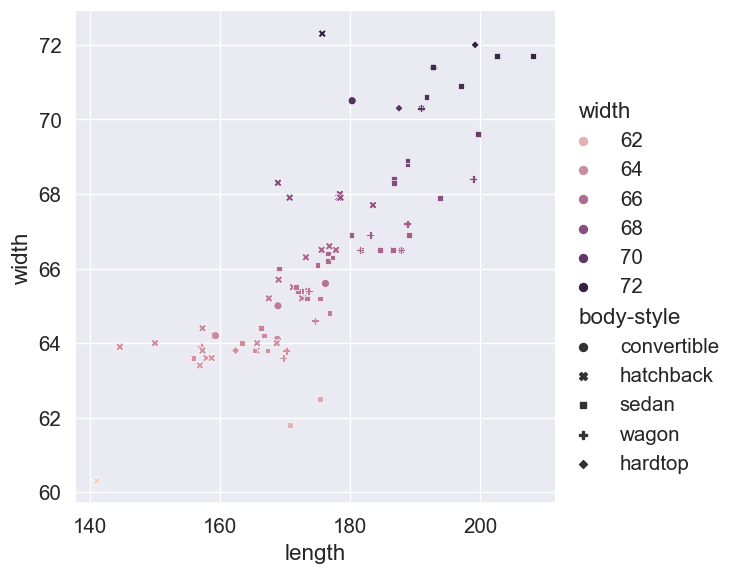

In [80]:
sns.relplot(x="length", y="width", hue="width", style="body-style", data=imports_85);

In this next one, we set the size of each point based on a numeric.

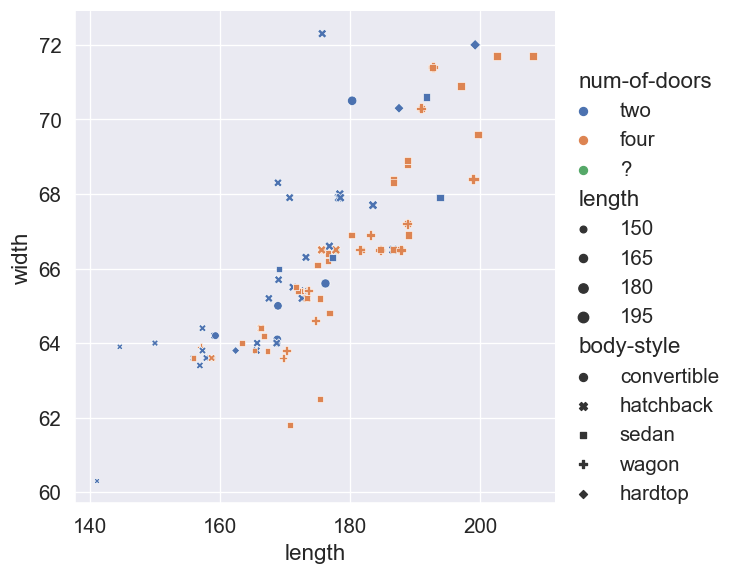

In [81]:
sns.relplot(x="length", y="width", size="length", hue="num-of-doors", style="body-style", data=imports_85);

# Plotting Categorical Data

That's plotting of numerics. Let's look now at plotting categoricals. Instead of `relplot` we use `catplot`. Here is the default behaviour. It plots the lengths for each categorical value.

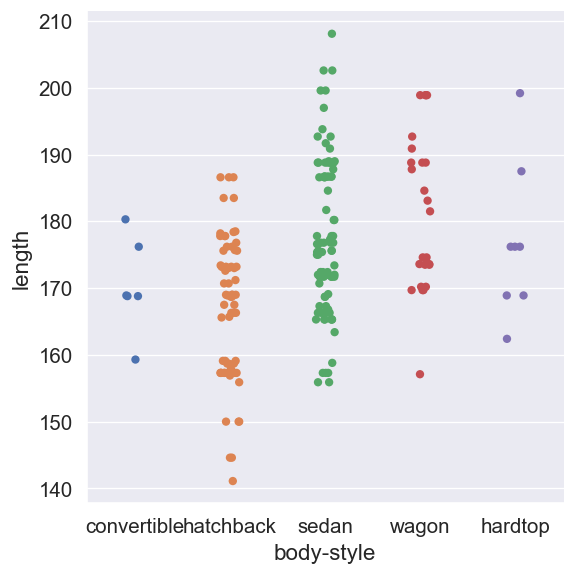

In [82]:
sns.catplot(x="body-style", y="length", data=imports_85);

Here's a similar graph, but it spreads the data points out so you can see how many there are.

/Users/adennorthcote/miniforge3/envs/31250/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adennorthcote/miniforge3/envs/31250/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


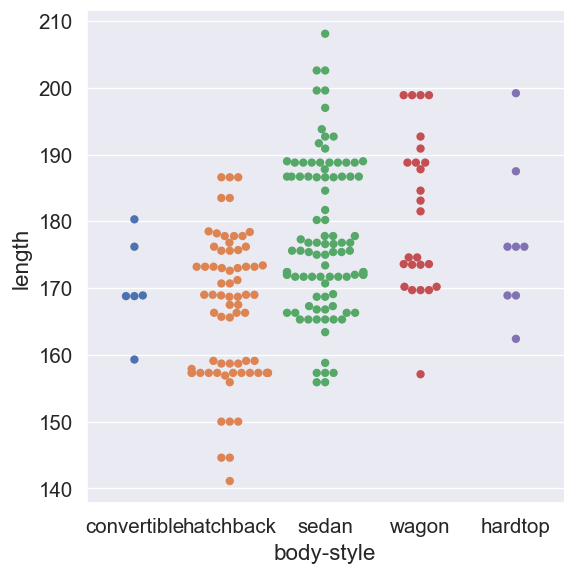

In [86]:
sns.catplot(x="body-style", y="length", kind="swarm", data=imports_85,);

The `boxplot` function allows you to do a box plot.

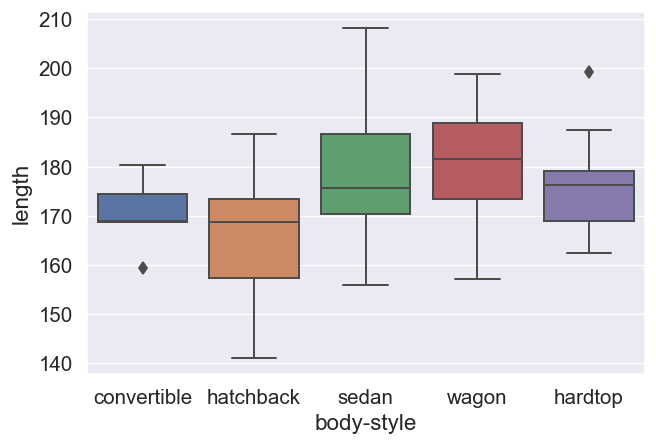

In [87]:
sns.boxplot(x="body-style", y="length", data=imports_85);

You can also get a box plot with the `catplot` function by setting the kind of plot. This one also colours the number of doors separately.

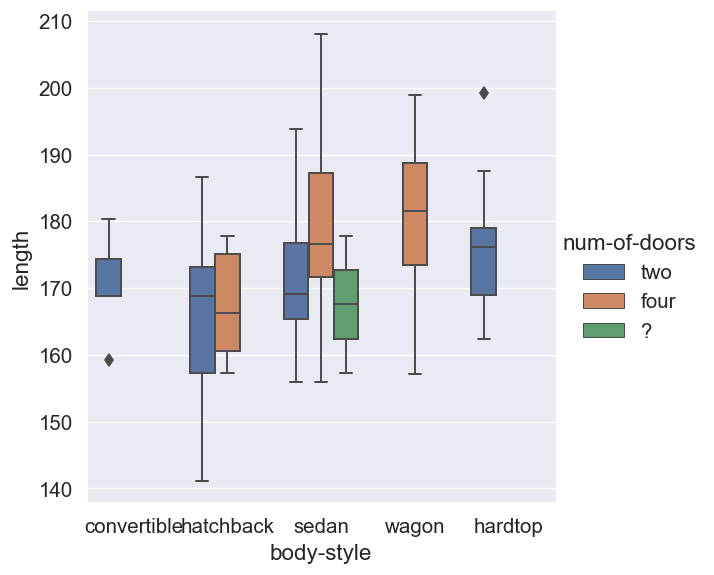

In [88]:
sns.catplot(x="body-style", y="length", hue="num-of-doors", kind="box", data=imports_85);

Another type of catplot is the bar plot, which you can get by changing the `kind`. This is essentially the same as the last plot except a bar plot instead of a box plot.

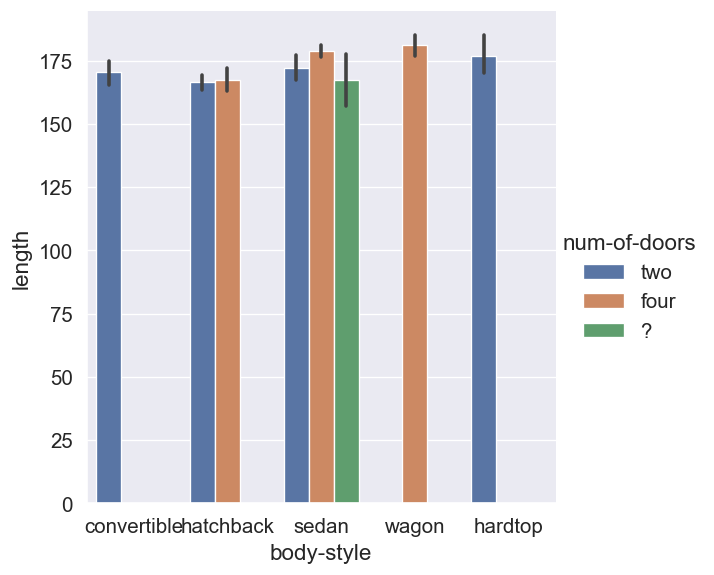

In [89]:
sns.catplot(x="body-style", y="length", hue="num-of-doors", kind="bar", data=imports_85);
#sns.catplot()

... and finally there are lots of other clever examples in the Examples Gallery. Hint: find one similar to what you want and then adapt the code.

https://seaborn.pydata.org/examples/index.html

The seaborn tutorial also shows you how to get more than one plot on the same page as well as lots of other neat tricks and kinds of plots.

Have fun exploring!